In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [154]:
df= pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [155]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

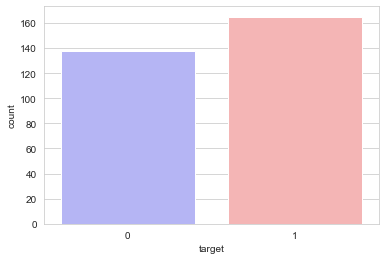

In [156]:
import seaborn as sns
sns.countplot(x='target', data=df, palette='bwr')
plt.show

In [157]:
countNoDisease= len(df[df.target==0])
countHaveDisease= len(df[df.target==1])

print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [158]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


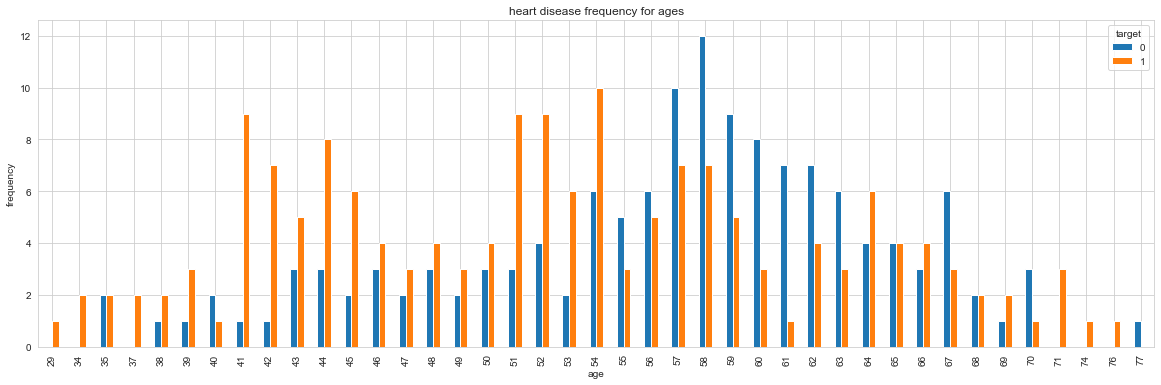

In [159]:
pd.crosstab(df.age,df.target).plot(kind='bar',figsize=(20,6))
plt.title('heart disease frequency for ages')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

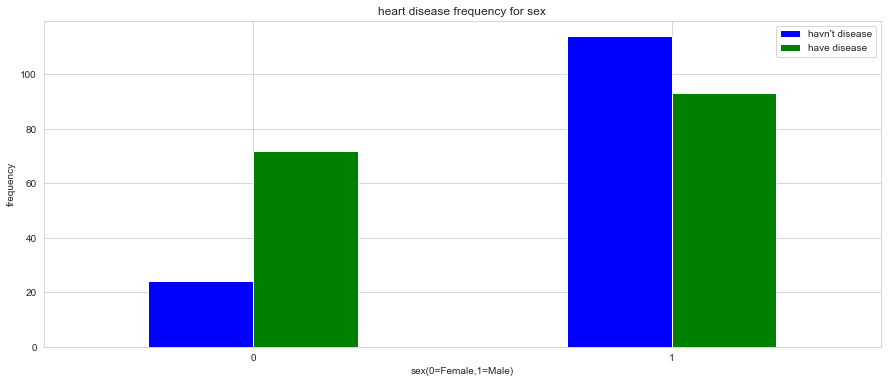

In [160]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['blue','green'])
plt.title('heart disease frequency for sex')
plt.xlabel('sex(0=Female,1=Male)')
plt.xticks(rotation=0)
plt.legend(["havn't disease",'have disease'])
plt.ylabel('frequency')
plt.show()

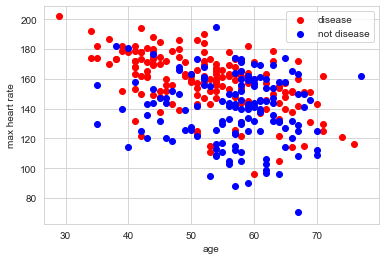

In [161]:
plt.scatter(x=df.age[df.target==1],y=df.thalach[(df.target==1)],c='red')
plt.scatter(x=df.age[df.target==0],y=df.thalach[(df.target==0)],c='blue')
plt.legend(['disease','not disease'])
plt.xlabel('age')
plt.ylabel('max heart rate')
plt.show()

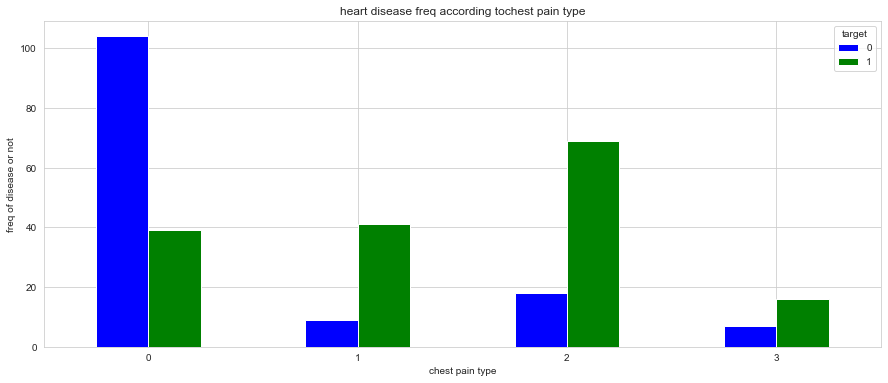

In [162]:
pd.crosstab(df.cp , df.target).plot(kind='bar',figsize=(15,6),color=['blue','green'])
plt.title('heart disease freq according tochest pain type')
plt.xlabel('chest pain type')
plt.xticks(rotation=0)
plt.ylabel('freq of disease or not')
plt.show()

In [163]:
a= pd.get_dummies(df['cp'],prefix='cp')
b= pd.get_dummies(df['thal'], prefix= "thal")
c= pd.get_dummies(df['slope'], prefix= "slope")

In [164]:
frames=[df,a,b,c]
df= pd.concat(frames, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [165]:
df= df.drop(columns=['cp','thal','slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [166]:
y= df.target.values
x= df.drop(['target'],axis=1)

In [167]:
# normalizing the data

#x= (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [168]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [169]:
# transpose matrices
#x_train= x_train.T
#y_train= y_train.T
#x_test= x_test.T
#y_test= y_test.T

In [170]:
lr= LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Chaitanya Kaul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [171]:
y_pred= lr.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [172]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [173]:
# confusion matrix
from sklearn.metrics import confusion_matrix
c_m= confusion_matrix(y_test,y_pred)
c_m

array([[22,  5],
       [ 4, 30]], dtype=int64)

In [174]:
accuracy={}
acc= lr.score(x_test,y_test)*100
accuracy['logistic regression']= acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 85.25%


In [175]:
 # from k nearest neighbours

In [176]:
from sklearn.neighbors import KNeighborsClassifier

In [177]:
knn= KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [178]:
prediction= knn.predict(x_test)

In [179]:
prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [180]:
y_test


array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [181]:
c_mm= confusion_matrix(y_test,prediction)
c_mm


array([[21,  6],
       [18, 16]], dtype=int64)

In [182]:
print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 60.66%


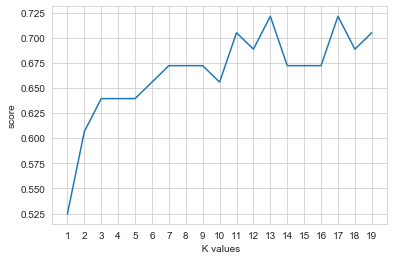

Maximum KNN Score is 85.25%


In [183]:
#try to find best k values

scorelist=[]
for i in range(1,20) :
    knn2= KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train)
    scorelist.append(knn2.score(x_test,y_test))
plt.plot(range(1,20),scorelist)
plt.xticks(np.arange(1,20,1))
plt.xlabel(" K values")
plt.ylabel("score")
plt.show()

acc== max(scorelist)*100
accuracy['KNN']=acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [184]:
from sklearn.svm import SVC

In [188]:
svm = SVC(kernel='linear',random_state = 0)
svm.fit(x_train, y_train)

acc = svm.score(x_test,y_test)*100
accuracy['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 85.25%


In [195]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracy['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 80.33%


In [196]:
from sklearn.ensemble import RandomForestClassifier

In [200]:
rfc= RandomForestClassifier(n_estimators=100,criterion='entropy')
rfc.fit(x_train,y_train)
acc= rfc.score(x_test,y_test)*100
accuracy['random forest']=acc

print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 88.52%


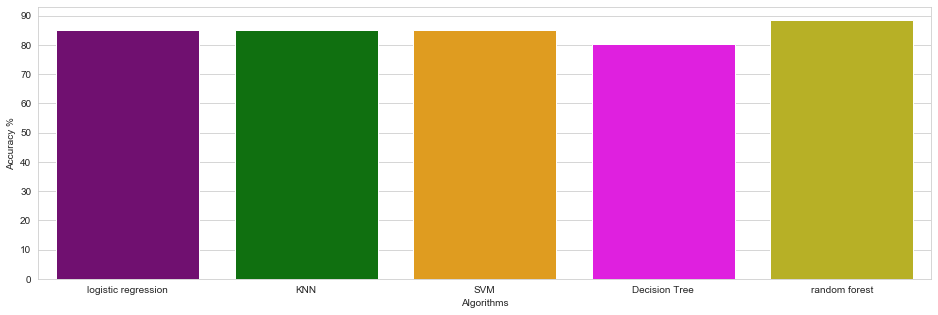

In [201]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette=colors)
plt.show()
